In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [16]:
Mydataset = pd.read_csv('imdb_top_1000.csv')

In [17]:
Mydataset

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [18]:
Mydataset.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [19]:
Mydataset.isnull().sum()

# the missing data in (Certificate) , (Meta_score) , (Gross)

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [20]:
Mydataset.Certificate.dtype  
Mydataset['Certificate'] = Mydataset['Certificate'].fillna('Unknown')
# fill with Unknown 

In [25]:
Mydataset.Meta_score.dtype  

Mydataset['Meta_score'] = Mydataset['Meta_score'].fillna( Mydataset['Meta_score'].mean())
#fill with mean 

In [22]:
Mydataset.Gross.dtype
Mydataset['Gross'] = Mydataset['Gross'].fillna('Unknown')

# fill with Unknown 

In [24]:
Mydataset.isnull().sum()

#Done (: 

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [32]:
# The Most popular 
count = Mydataset['Genre'].value_counts()

# the Most popular Type is Drama 

In [42]:
df = pd.DataFrame(count)
df.head()

,Genre
Drama,85
"Drama, Romance",37
"Comedy, Drama",35
"Comedy, Drama, Romance",31
"Action, Crime, Drama",30


<BarContainer object of 3 artists>

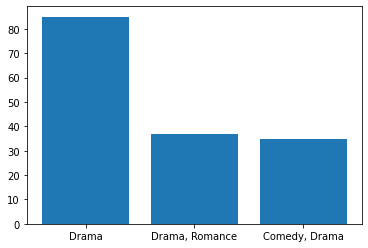

In [46]:

 x = df.index[0:3]
 y = df.Genre[0:3]

plt.bar(x,y)


In [59]:
# i understand from the question that you need the director of the top-rated movie 

TopRated  = Mydataset['IMDB_Rating'].value_counts().sort_values()
max_rating = Mydataset['IMDB_Rating'].max()
max_rating

# Filter the dataset to get only the rows with the top rating

top_rated_movies = Mydataset[Mydataset['IMDB_Rating'] == max_rating]

# get directors
directors = top_rated_movies['Director'].unique()

#make dataframe
top_rated_df = pd.DataFrame({'Director': directors, 'IMDB_Rating': max_rating})

top_rated_df

,Director,IMDB_Rating
0,Frank Darabont,9.3


<BarContainer object of 1 artists>

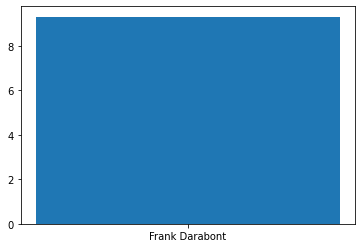

In [60]:

 x = top_rated_df.Director
 y = top_rated_df.IMDB_Rating

plt.bar(x,y)





# in this given dataset ,  There is not a lot of missing data, which is good
# The most famous films are in the drama genre
# The most rated movie is 9.3, and its director is Frank Darabont

